In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
import os

import yaml

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import galcheat
import matplotlib as mpl

# import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pdf2image import convert_from_path

import madness_benchmark.boxplot
from madness_benchmark.utils import get_benchmark_config_path

mpl.rcParams["text.usetex"] = True
mpl.rcParams["savefig.dpi"] = 1200

# plt.rcParams[
#     "text.latex.preamble"
# ] = r"\usepackage{bm} \usepackage{amsmath}"  # for \text command

In [ ]:
with open(get_benchmark_config_path()) as f:
    benchmark_config = yaml.safe_load(f)
survey = galcheat.get_survey(benchmark_config["survey_name"])

In [ ]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)


def format_func(value, tick_number):
    # Format the y-axis labels as integers without decimals
    return "{:.3f}".format(value)

In [ ]:
density_level = "high"

data_path = os.path.join(
    benchmark_config["RESULTS_PATH"][benchmark_config["survey_name"]],
    density_level + "_density",
)
run_name = "kl2"  # 12 to 20 galaxies
result_dir_path = os.path.join(data_path, run_name)

In [ ]:
scarlet_plot_color = sns.color_palette("colorblind")[4]
madness_plot_color = sns.color_palette("colorblind")[0]
debvader_plot_color = sns.color_palette("colorblind")[2]

isolated_plot_color = sns.color_palette("colorblind")[6]
blended_plot_color = sns.color_palette("colorblind")[1]

madness_plot_ls = "dashdot"
debvader_plot_ls = "dotted"
scarlet_plot_ls = "-"

isolated_plot_ls = "dotted"
blended_plot_ls = "--"

scarlet_plot_label = r"\textsc{scarlet}"
madness_plot_label = r"\texttt{MADNESS}"
debvader_plot_label = r"\texttt{VAE-deblender}"

In [ ]:
madness_results = []
debvader_results = []
scarlet_results = []
actual_photometry = []
blended_photometry = []

for file_num in range(300):

    madness_results.append(
        pd.read_pickle(
            os.path.join(result_dir_path, "madness_results", str(file_num) + ".pkl")
        )
    )
    debvader_results.append(
        pd.read_pickle(
            os.path.join(result_dir_path, "debvader_results", str(file_num) + ".pkl")
        )
    )
    scarlet_results.append(
        pd.read_pickle(
            os.path.join(data_path, "scarlet_results", str(file_num) + ".pkl")
        )
    )

    actual_photometry.append(
        pd.read_pickle(
            os.path.join(data_path, "actual_photometry", str(file_num) + ".pkl")
        )
    )
    blended_photometry.append(
        pd.read_pickle(
            os.path.join(data_path, "blended_photometry", str(file_num) + ".pkl")
        )
    )

madness_results = pd.concat(madness_results)
debvader_results = pd.concat(debvader_results)
scarlet_results = pd.concat(scarlet_results)

actual_photometry = pd.concat(actual_photometry)
blended_photometry = pd.concat(blended_photometry)

In [ ]:
# df_plot = {
#     "e_deblended": list(madness_results["r_e"].values) + list(debvader_results["r_e"].values),
#     "e1_deblended": list(madness_results["r_e1"].values) + list(debvader_results["r_e1"].values),
#     "e2_deblended": list(madness_results["r_e2"].values) + list(debvader_results["r_e2"].values),
#     "e_actual": list(actual_photometry["r_e"].values) * 2,
#     "e1_actual": list(actual_photometry["r_e1"].values) * 2,
#     "e2_actual": list(actual_photometry["r_e2"].values) * 2,
#     "contamination": list(madness_results["r_contamination"].values) * 2,
#     "deblender": [madness_plot_label]*len(madness_results) + [scarlet_plot_label]*len(madness_results),
#     "snr": list(madness_results["r_band_snr"])*2,
#     "contamination": list(madness_results["r_contamination"])*2,
# }


df_plot = {
    "e_deblended": list(madness_results["r_e"].values)
    + list(scarlet_results["r_e"].values)
    + list(debvader_results["r_e"].values),
    "e1_deblended": list(madness_results["r_e1"].values)
    + list(scarlet_results["r_e1"].values)
    + list(debvader_results["r_e1"].values),
    "e2_deblended": list(madness_results["r_e2"].values)
    + list(scarlet_results["r_e2"].values)
    + list(debvader_results["r_e2"].values),
    "e_actual": list(actual_photometry["r_e"].values) * 3,
    "e1_actual": list(actual_photometry["r_e1"].values) * 3,
    "e2_actual": list(actual_photometry["r_e2"].values) * 3,
    "contamination": list(madness_results["r_contamination"].values) * 3,
    "deblender": [madness_plot_label] * len(madness_results)
    + [scarlet_plot_label] * len(madness_results)
    + [debvader_plot_label] * len(madness_results),
    "snr": list(madness_results["r_band_snr"].values) * 3,
}

df_plot = pd.DataFrame(df_plot)

df_plot["e_residual"] = df_plot["e_deblended"] - df_plot["e_actual"]
df_plot["e1_residual"] = df_plot["e1_deblended"] - df_plot["e1_actual"]
df_plot["e2_residual"] = df_plot["e2_deblended"] - df_plot["e2_actual"]

In [ ]:
contamination_cut = 0.01
mask = df_plot["contamination"] >= contamination_cut

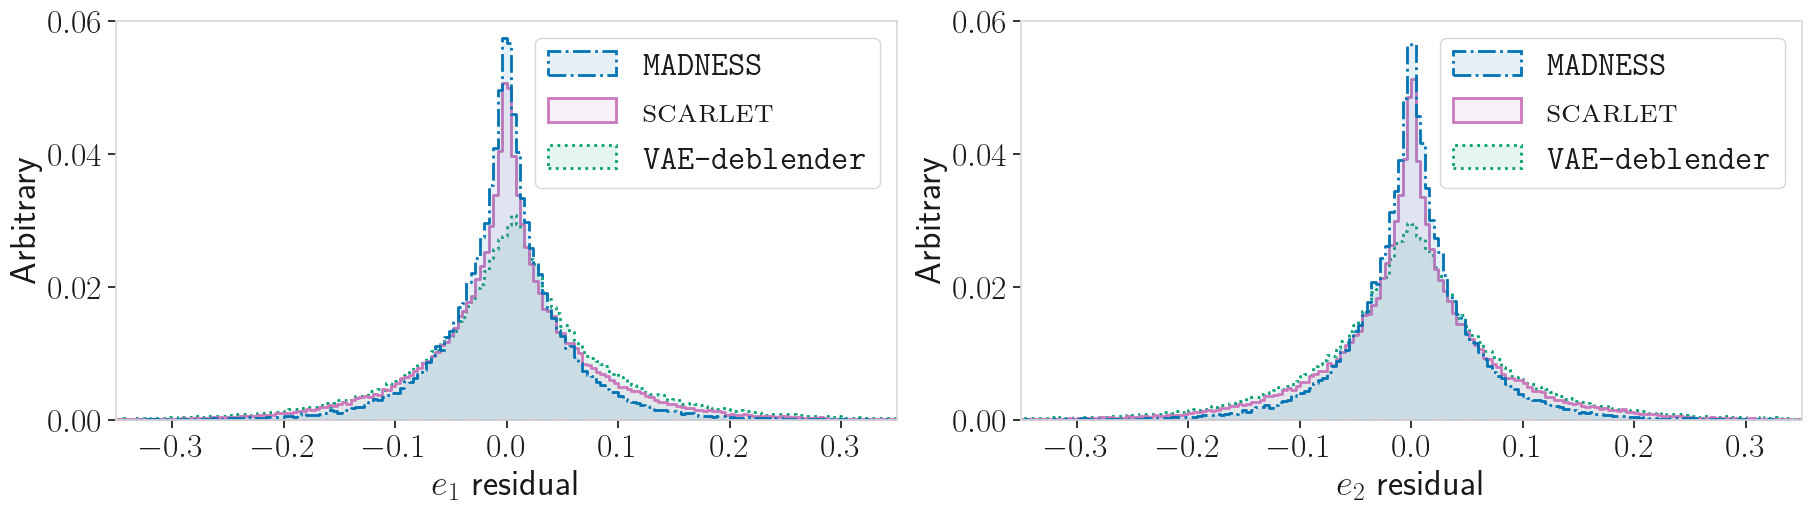

In [ ]:
sns.set_theme(
    font_scale=2.2,
    style={
        "style": "whitegrid",
        "xtick.bottom": True,
        "axes.grid": False,
        "xtick.top": False,
        "ytick.left": True,
        "ytick.right": False,
        "text.color": ".1",
        "xtick.color": ".1",
        "ytick.color": ".1",
        "axes.edgecolor": ".85",
        "axes.labelcolor": ".1",
    },
    rc={"grid.color": ".85", "grid.linestyle": "--"},
)
fig = plt.figure(layout="constrained", figsize=(18, 5))
axes = fig.subplots(1, 2)

lss = [madness_plot_ls, scarlet_plot_ls, debvader_plot_ls]
lcs = [madness_plot_color, scarlet_plot_color, debvader_plot_color]


for i in range(2):
    bins = np.arange(-0.5, 0.5, 0.004)
    p = sns.histplot(
        df_plot,
        bins=bins,
        x=f"e{i+1}_residual",
        hue="deblender",
        element="step",
        alpha=0.1,
        common_norm=False,
        palette=lcs,
        stat="probability",
        lw=2,
        ax=axes[i],
    )

    handles = p.legend_.legend_handles
    p.legend_.set_title("")

    for line, ls, handle in zip(p.collections[::-1], lss, handles):
        line.set_linestyle(ls)
        handle.set_ls(ls)

    p.set_xlabel(rf"$e_{i+1}$ residual")
    p.set_ylabel("Arbitrary")

    p.set_xlim((-0.35, 0.35))
    p.set_ylim((0, 0.06))

plt.savefig(os.path.join("results", "shapes.pdf"))

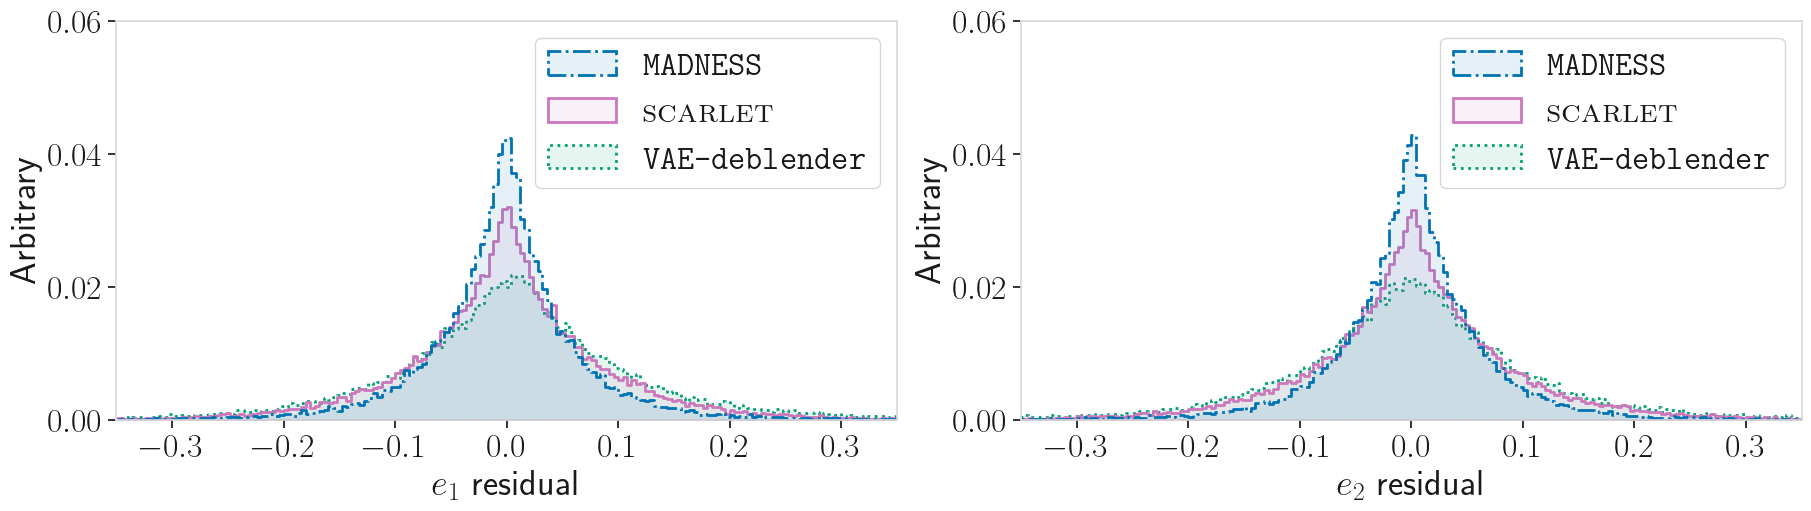

In [ ]:
sns.set_theme(
    font_scale=2.2,
    style={
        "style": "whitegrid",
        "xtick.bottom": True,
        "axes.grid": False,
        "xtick.top": False,
        "ytick.left": True,
        "ytick.right": False,
        "text.color": ".1",
        "xtick.color": ".1",
        "ytick.color": ".1",
        "axes.edgecolor": ".85",
        "axes.labelcolor": ".1",
    },
    rc={"grid.color": ".85", "grid.linestyle": "--"},
)

fig = plt.figure(layout="constrained", figsize=(18, 5))
axes = fig.subplots(1, 2)

lss = [madness_plot_ls, scarlet_plot_ls, debvader_plot_ls]
lcs = [madness_plot_color, scarlet_plot_color, debvader_plot_color]

for i in range(2):
    bins = np.arange(-0.5, 0.5, 0.004)
    p = sns.histplot(
        df_plot[mask],
        bins=bins,
        x=f"e{i+1}_residual",
        hue="deblender",
        element="step",
        alpha=0.1,
        common_norm=False,
        palette=lcs,
        stat="probability",
        lw=2,
        ax=axes[i],
    )

    handles = p.legend_.legend_handles

    p.legend_.set_title("")

    for line, ls, handle in zip(p.collections[::-1], lss, handles):
        line.set_linestyle(ls)
        handle.set_ls(ls)

    p.set_xlabel(rf"$e_{i+1}$ residual")
    p.set_ylabel("Arbitrary")

    p.set_xlim((-0.35, 0.35))
    p.set_ylim((0, 0.06))
plt.savefig(os.path.join("results", "shapes_cut.pdf"))

In [ ]:
print(
    np.std(
        df_plot[mask]["e1_residual"][df_plot[mask]["deblender"] == madness_plot_label]
    )
)
print(
    np.std(
        df_plot[mask]["e1_residual"][df_plot[mask]["deblender"] == scarlet_plot_label]
    )
)

0.08687983413843428
0.10280470904862891


In [ ]:
print(np.std(df_plot["e1_residual"][df_plot["deblender"] == madness_plot_label]))
print(np.std(df_plot["e1_residual"][df_plot["deblender"] == scarlet_plot_label]))
print(np.std(df_plot["e1_residual"][df_plot["deblender"] == debvader_plot_label]))

0.06886681683702406
0.08360151057017405
0.10382325379758052


# Box plots

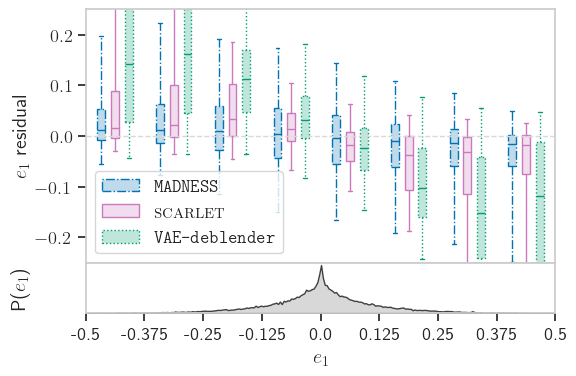

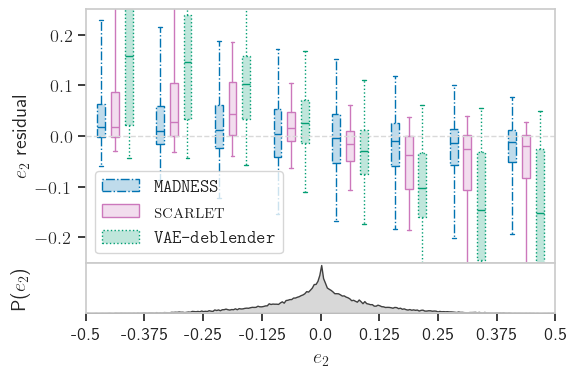

In [ ]:
x_lim = 0.5
nbins = 8
for i in range(2):
    (
        fig,
        median_e1_err,
        q1_e1_err,
        q3_e1_err,
        whislo_e1_err,
        whishi_e1_err,
    ) = madness_benchmark.boxplot.boxplot_func(
        df_plot[mask],
        x=f"e{i+1}_actual",
        y=f"e{i+1}_residual",
        z="deblender",
        xlim=(-x_lim, x_lim),
        ylim=(-0.25, 0.25),
        x_scale=None,
        legend=[madness_plot_label, scarlet_plot_label, debvader_plot_label],
        x_label=rf"$e_{i+1}$",
        y_label=rf"$e_{i+1}$ residual",
        y_label_hist=rf"P($e_{i+1}$)",
        legend_remove=False,
        legend_location="lower left",
        x_ticks=np.arange(-x_lim, x_lim + x_lim / nbins, 2 * x_lim / nbins),
        x_ticklabels=np.arange(-x_lim, x_lim + x_lim / nbins, 2 * x_lim / nbins),
        whis=[5, 95],
        percents=[25, 75],
        palette=[madness_plot_color, scarlet_plot_color, debvader_plot_color],  # 0.35,
        ls=[madness_plot_ls, scarlet_plot_ls, debvader_plot_ls],
        nbins=nbins,
        x_major_grid=False,
        sns_font_scale=1.2,
    )

    plt.savefig(os.path.join("results", "temp", f"e{i+1}_box_plot.pdf"))

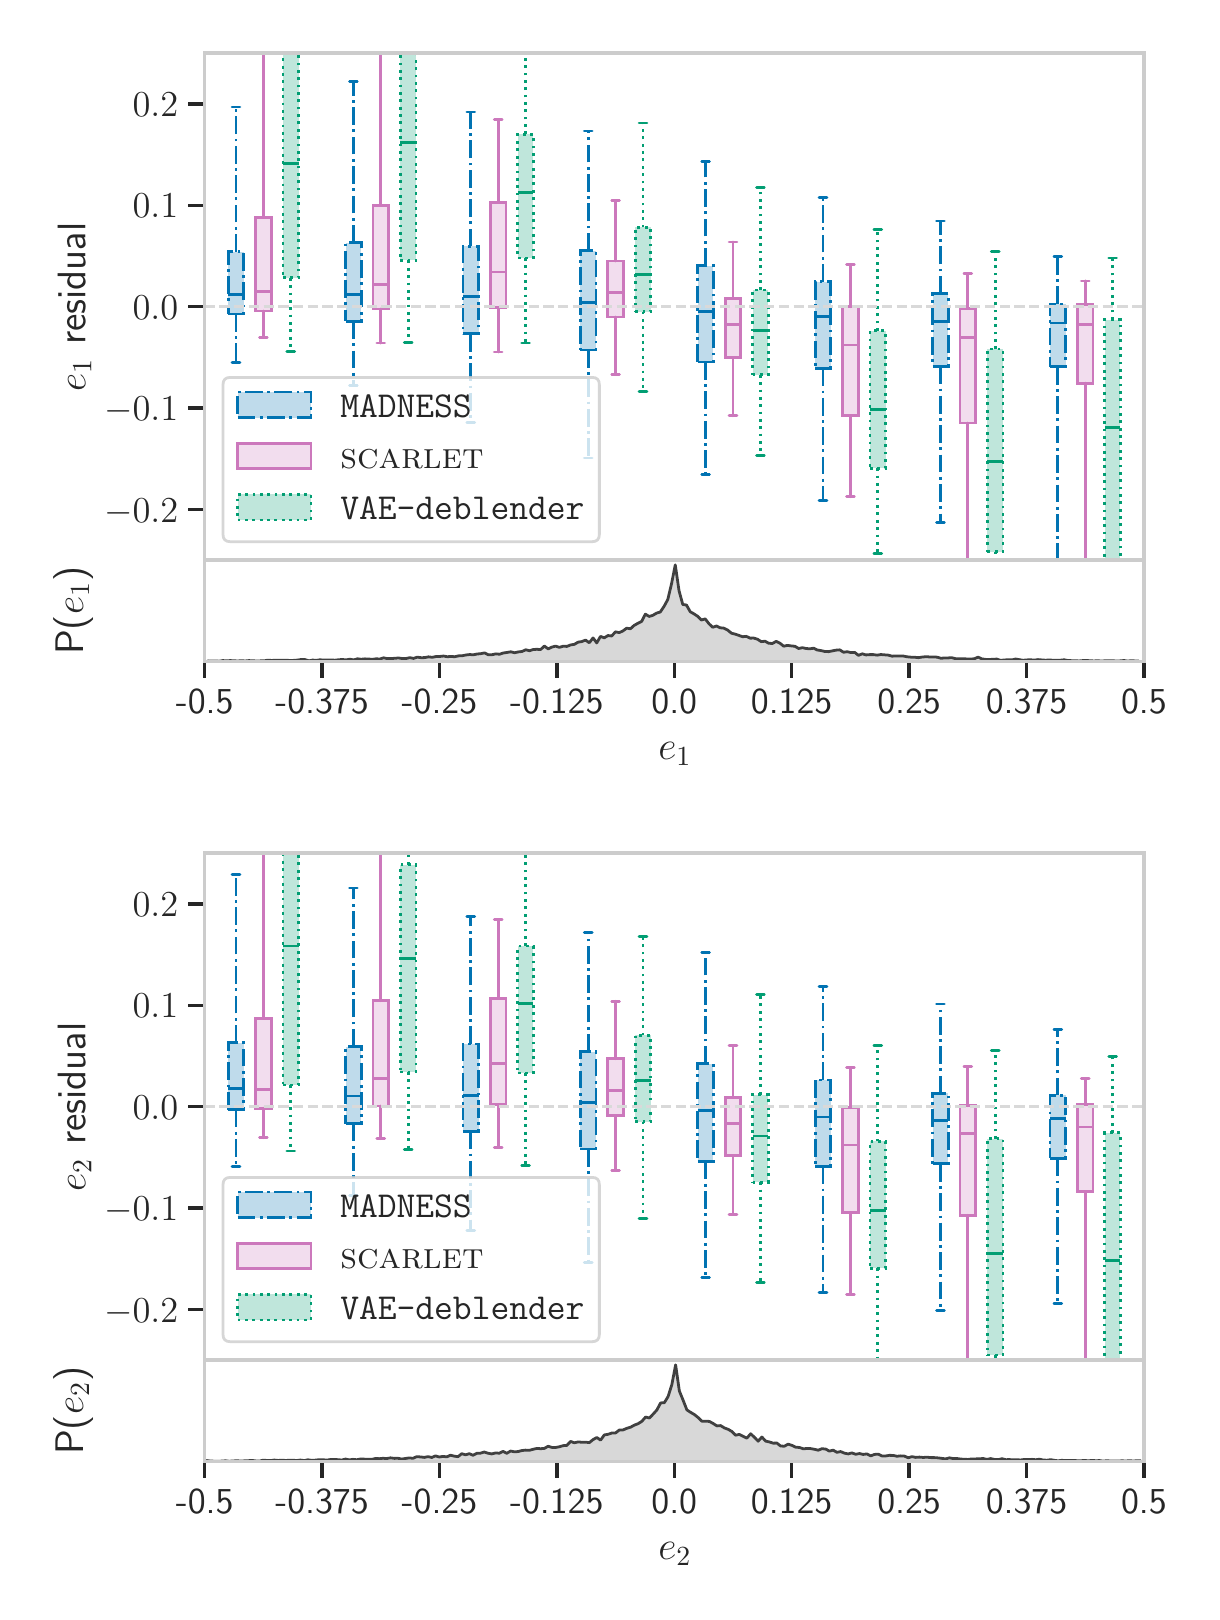

In [ ]:
f, axarr = plt.subplots(2, 1, figsize=(12, 16))

# axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))

axarr[0].imshow(
    convert_from_path(os.path.join("results", "temp", "e1_box_plot.pdf"))[0]
)
axarr[1].imshow(
    convert_from_path(os.path.join("results", "temp", "e2_box_plot.pdf"))[0]
)


# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout(pad=0)

plt.savefig(
    os.path.join("results", "shapes_boxplot_results.pdf"),
    format="pdf",
    bbox_inches="tight",
)

plt.show()